In [5]:
def visualize_transforms(img_path):
    import matplotlib.pyplot as plt
    import torchvision.transforms as transforms
    from PIL import Image
    import numpy as np
    import torch

    # Загрузка изображения
    original_image = Image.open(img_path).convert('RGB')

    # Определение трансформаций
    resize = transforms.Resize((256, 256))
    crop = transforms.RandomResizedCrop(224, scale=(0.9, 1.0))
    color_jitter = transforms.ColorJitter(brightness=0.2, contrast=0.2)
    to_tensor = transforms.ToTensor()
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

    # Промежуточные этапы
    resized_img = resize(original_image)
    cropped_img = crop(resized_img)
    jittered_img = color_jitter(cropped_img)
    tensor_img = to_tensor(jittered_img)
    normalized_img = normalize(tensor_img)

    # Функция денормализации для визуализации
    def imshow(tensor, title=None):
        img = tensor.clone().detach().cpu().numpy()
        img = img.transpose(1, 2, 0)
        img = np.clip(img * np.array([0.229, 0.224, 0.225]) +
                      np.array([0.485, 0.456, 0.406]), 0, 1)
        plt.imshow(img)
        if title:
            plt.title(title)
        plt.axis('off')

    # Отображение
    plt.figure(figsize=(16, 5))

    plt.subplot(1, 5, 1)
    plt.imshow(original_image)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(resized_img)
    plt.title('Resized (256x256)')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(cropped_img)
    plt.title('Random Crop (224x224)')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(jittered_img)
    plt.title('Color Jitter')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    imshow(normalized_img, title='Normalized')
    plt.tight_layout()
    plt.show()

1. **Resize (256×256)** – приведение изображения к фиксированному размеру (исходное разрешение 5184x3456).
2. **RandomResizedCrop (224×224)** – случайное кадрирование с масштабированием.
3. **ColorJitter** – случайные изменения яркости и контрастности (на +-20% от исходных значений).
4. **ToTensor** – преобразование изображения в тензор PyTorch.
5. **Normalize** – нормализация значений каналов по статистике ImageNet.


Тензор — это обобщение понятий скаляр, вектор и матрица на более высокие размерности.
В контексте машинного обучения (например, в PyTorch), тензор — это многомерный массив чисел.

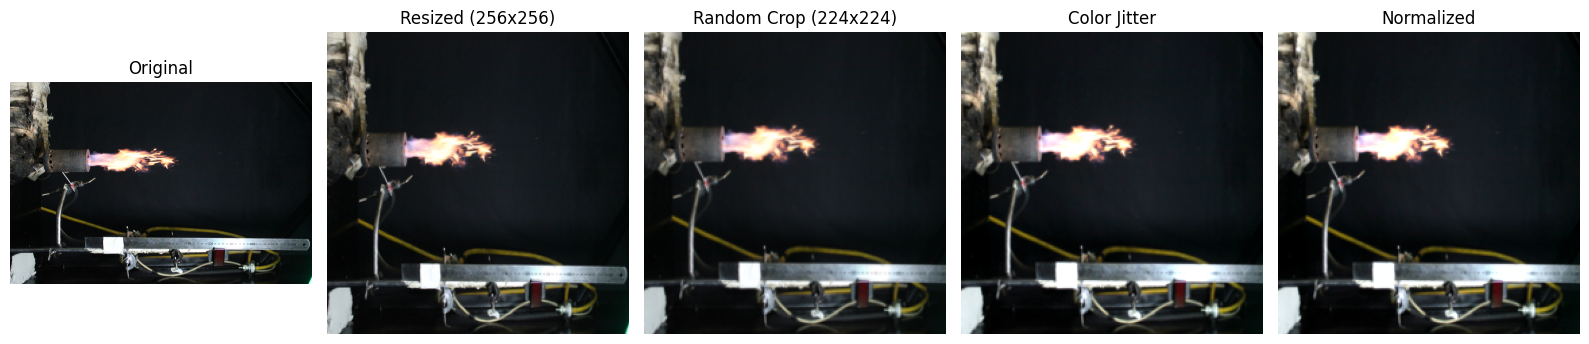

In [6]:
visualize_transforms('C:/Users/evils/PycharmProjects/FlameRecognition/data/images/200_800/IMG_6222.JPG')

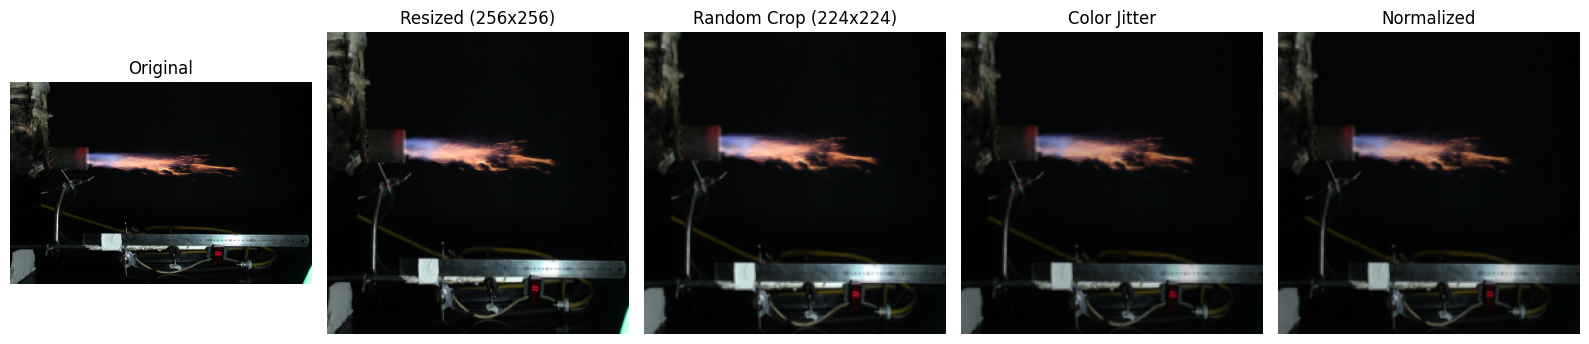

In [7]:
visualize_transforms("C:/Users/evils/PycharmProjects/FlameRecognition/data/images/1000_2000/IMG_6724.JPG")

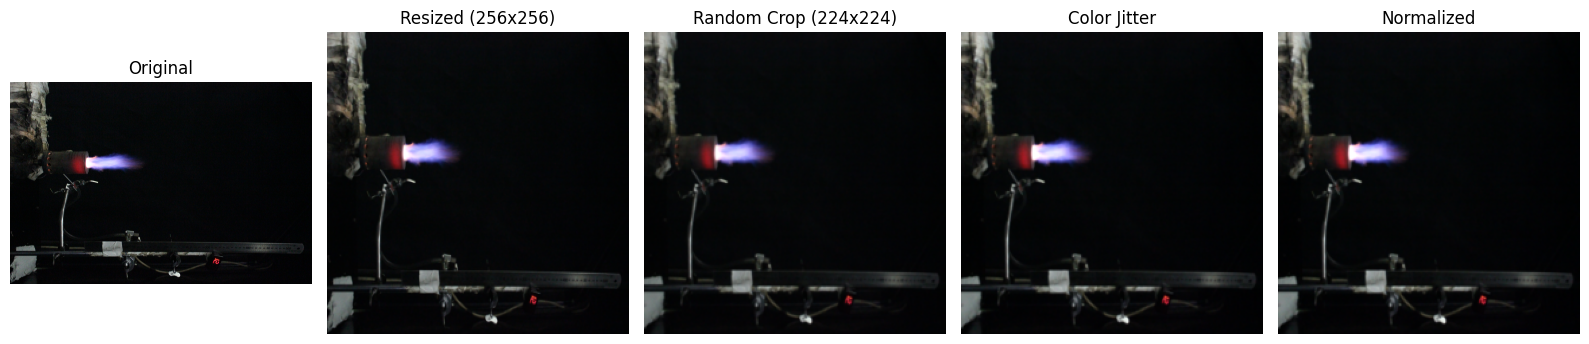

In [9]:
visualize_transforms("C:/Users/evils/PycharmProjects/FlameRecognition/data/images/1400_1600/IMG_6840.JPG")